# Probabilidade e Estatística

## Curso Superior de Tecnologia em Ciência de Dados

### Prof. Dr. Neylson Crepalde

Conteúdo abordado: distribuições amostrais

Principal fonte: STEVENSON, Wiliam J.; DE FARIAS, Alfredo Alves. **Estatística aplicada à administração.** São Paulo: Harper e Row do Brasil, 1981.

---

# Distribuições amostrais

**A finalidade** da amostragem é obter uma indicação do valor de um ou mais parâmetros de uma população, tais como a média, o desvio padrão populacional, ou a proporção de itens que possuem determinada característica. As estatísticas amostrais que correspondem a esses parâmetros populacionais são usadas para aproximar os valores desconhecidos daqueles parâmetros. Assim é que a média amostral é usada para estimar a média da população, o desvio padrão amostral é usado para estimar o desvio padrão populacional, e a proporção amostral serve para estimar a proporção da população.

Uma das realidades da amostragem aleatória é que, quando se extraem repetidas amostras da mesma população, há uma tendência de a estatística amostral variar de uma amostra para outra, e também em relação ao verdadeiro valor do parâmetro, simplesmente em razão de fatores causais relacionados à amostragem (*variabilidade amostral*). 

De modo geral, pode parecer difícil lidar, de maneira racional, com a variabilidade amostral. No caso da amostragem *aleatória*, entretanto, demonstra-se matematicamente que a variabilidade pode ser descrita por distribuições de probabilidades tais como a normal e a binomial. **Quando as distribuições de probabilidade são usadas desta maneira, são conhecidas como distribuições amostrais**. 

A questão a responder para cada amostra é: *Quão próxima está a estatística amostral do verdadeiro valor do parâmetro populacional?* A resposta depende de três fatores:

1. A estatística a ser considerada;
2. O tamanho da amostra;
3. A variabilidade existente na própria população.

> Uma *distribuição amostral* é uma distribuição de probabilidades que indica até que ponto uma estatística amostral tende a variar devido a variações causais na amostragem aleatória.

#### Exemplo

Suponhamos que um fazendeiro deseja vender alguns porcos. Para simplicidade, limitemos a população a 5 porcos. Os respectivos pesos dos porcos são conforme a tabela abaixo:

| Porco | Peso (lb) |
|-------|-----------|
| A     | 200       |
| B     | 203       |
| C     | 206       |
| D     | 209       |
| E     | 212       |
|       | 1030      |

Suponhamos que qualquer porco que pese menos que 205 lbs seja considerado magro e não pode ser vendido a preço razoável. A proporção de porcos magros é, portanto, $\frac{2}{5}$ da população. Suponhamos que o fazendeiro quisesse estimar a proporção de seus porcos que estão abaixo do peso a partir de uma amostra de porcos. Que proporções amostrais são possíveis e quão viável é cada uma? Queremos a *distribuição amostral* da situação.

A tabela abaixo ilustra todas as amostras possíveis da população de porcos do fazendeiro.

| Tamanho da amostra | Número de amostras possíveis | Combinação de amostras | Pesos amostrais | Proporção de magros |
|--------------------|------------------------------|------------------------|-----------------|---------------------|
| 2 | 10 | A, B | 200, 203 | 2/2 |
|  |  | A, C | 200, 206 | 1/2 |
|  |  | A, D | 200, 209 | 1/2 |
|  |  | A, E | 200, 212 | 1/2 |
|  |  | B, C | 203, 206 | 1/2 |
|  |  | B, D | 203, 206 | 1/2 |
|  |  | B, E | 203, 212 | 1/2 |
|  |  | C, D | 206, 209 | 0/2 |
|  |  | C, E | 206, 212 | 0/2 |
|  |  | D, E | 209, 212 | 0/2 |

A distribuição amostral mostra que as propoções amostrais possíveis são 0/2, 1/2 e 2/2. Mostra também *quão provável* é cada proporção, sob a hipótese de que cada porco tenha a mesma chance de ser incluído na amostra (isto é, amostragem *aleatória*). Por exemplo, há uma probabilidade de 0,6 de a proporção amostral ser 1/2, o que está próximo da proporçao real (como são usadas amostras de 2, seria impossível termos uma proporção *amostral* de 2/5).

In [1]:
using Plots, LaTeXStrings, Distributions, StatsBase, StatsPlots, Random, KernelDensity

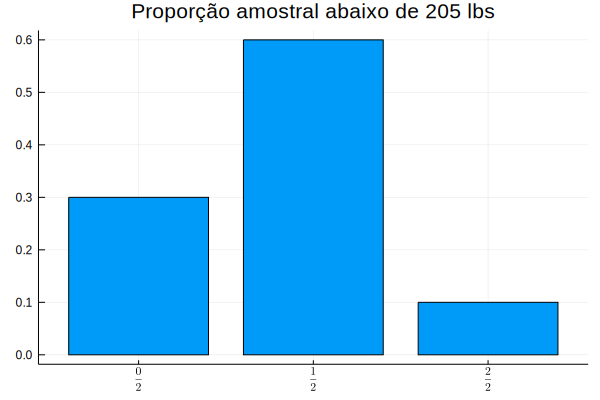

In [2]:
bar(1:3, [0.3, 0.6, 0.1], legend=false, title="Proporção amostral abaixo de 205 lbs")
xticks!(1:3, [L"\frac{0}{2}", L"\frac{1}{2}", L"\frac{2}{2}"])

# Efeito do tamanho da amostra sobre uma distribuição amostral

Pode ser demonstrado que à medida que aumenta o tamanho da amostra, (1) a distribuição amostral das proporções tende para a normalidade e (2) a variabilidade amostral decresce.

Vamos replicar o exemplo dos porcos agora com uma população simulada de 1000 porcos.

In [3]:
pesos = trunc.(Int, rand(Uniform(200, 212), 1000))

1000-element Array{Int64,1}:
 207
 210
 205
 201
 205
 208
 206
 200
 206
 210
 206
 207
 207
   ⋮
 202
 205
 210
 211
 205
 206
 205
 209
 204
 200
 207
 204

Vamos verificar qual é a real proporção de porcos abaixo do peso na população que geramos:

In [4]:
function get_prop_magros(x)
    binaria = ifelse.(x .< 205, 1, 0)
    return sum(binaria) / length(binaria)
end

get_prop_magros (generic function with 1 method)

In [5]:
get_prop_magros(pesos)

0.415

39%. Agora vamos verificar 1000 amostras com diferentes tamanhos para ver como a distribuição amostral se comporta:

In [6]:
function generate_samples()
    amostras = Dict{Int, Any}()
    for i in [10, 20, 50, 100, 200]
        s = [sample(pesos, i, replace=false) for j in 1:1000]
        amostras[i] = get_prop_magros.(s)
    end
    return amostras
end

generate_samples (generic function with 1 method)

In [7]:
provas = generate_samples()

Dict{Int64,Any} with 5 entries:
  200 => [0.44, 0.4, 0.41, 0.41, 0.425, 0.445, 0.43, 0.415, 0.375, 0.425  …  0.…
  100 => [0.38, 0.41, 0.5, 0.55, 0.46, 0.39, 0.36, 0.47, 0.38, 0.47  …  0.39, 0…
  10  => [0.3, 0.7, 0.4, 0.5, 0.2, 0.4, 0.7, 0.7, 0.5, 0.4  …  0.3, 0.4, 0.4, 0…
  50  => [0.36, 0.44, 0.46, 0.42, 0.52, 0.36, 0.38, 0.44, 0.36, 0.4  …  0.4, 0.…
  20  => [0.25, 0.4, 0.35, 0.35, 0.3, 0.4, 0.65, 0.2, 0.45, 0.25  …  0.6, 0.5, …

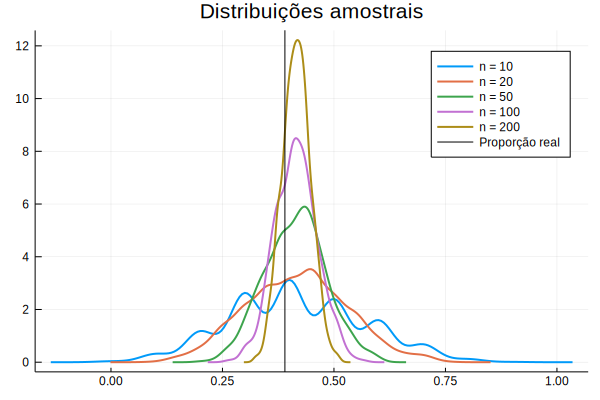

In [8]:
for i in [10, 20, 50, 100, 200]
    if i == 10
        density(provas[i], label=string("n = ", i), width=2)
    else
        density!(provas[i], label=string("n = ", i), width=2)
    end
end
title!("Distribuições amostrais")
vline!([0.39], label="Proporção real", color=:black, width=1)

# Distribuições de médias amostrais

A distribuição amostral das médias amostrais sofre o mesmo efeito observado nas proporções identificadas acima. 

#### Exemplo

Uma turma da faculdade possui 5000 alunos. Vamos simular as idades desses alunos usando uma distribuição normal.

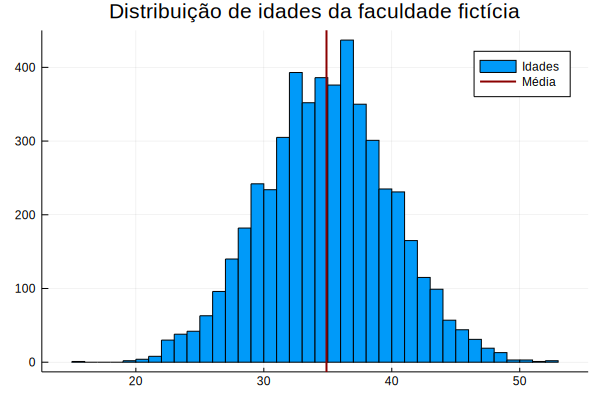

In [9]:
idades = rand(Normal(35, 5), 5000)
histogram(idades, legend=true, title="Distribuição de idades da faculdade fictícia", label="Idades")
vline!([mean(idades)], label="Média", width=2, color=:darkred)

In [10]:
print("Média real: ")
mean(idades)

Média real: 

34.89742536460814

Agora vamos observar como a distribuição amostral das médias de idade amostrais se comportam.

In [11]:
tamanhos_amostra = [50, 100, 200, 500]

4-element Array{Int64,1}:
  50
 100
 200
 500

In [12]:
function generate_mean_distributions(vetor, tamanhos)
    medias = Dict{Int, Any}()
    for i in tamanhos
        s = [sample(vetor, i, replace=false) for j in 1:i]
        medias[i] = mean(s)
    end
    return medias
end

generate_mean_distributions (generic function with 1 method)

In [13]:
@time medias = generate_mean_distributions(idades, tamanhos_amostra)

  0.449817 seconds (394.97 k allocations: 46.334 MiB, 7.55% gc time)


Dict{Int64,Any} with 4 entries:
  200 => [34.5137, 34.8784, 35.0494, 34.9093, 35.0829, 35.0224, 35.4538, 34.975…
  100 => [34.3805, 34.3784, 34.3143, 35.3285, 35.3712, 35.2912, 35.3064, 34.834…
  50  => [34.9537, 35.3148, 35.4537, 35.2771, 35.0452, 35.403, 34.4506, 34.917,…
  500 => [34.902, 35.0388, 35.2344, 34.5731, 34.8557, 34.7102, 34.927, 34.7883,…

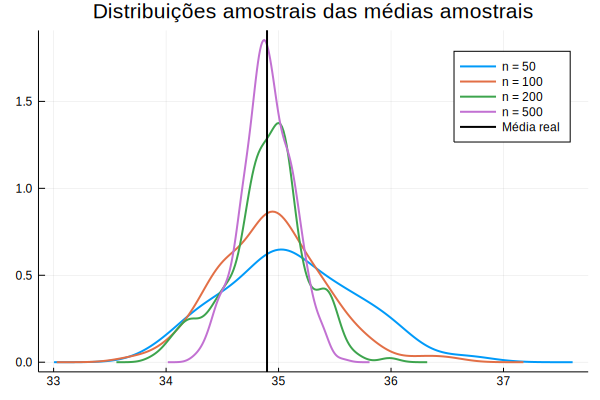

In [14]:
for i in tamanhos_amostra
    if i == minimum(tamanhos_amostra)
        density(medias[i], label=string("n = ", i), width=2)
    else
        density!(medias[i], label=string("n = ", i), width=2)
    end
end
title!("Distribuições amostrais das médias amostrais")
vline!([mean(idades)], label="Média real", color=:black, width=2)

In [15]:
for i in tamanhos_amostra
    print("Desvio padrão na amostra de tamanho " * string(i) * " :")
    println(std(medias[i]))
end

Desvio padrão na amostra de tamanho 50 :0.5905381562507014
Desvio padrão na amostra de tamanho 100 :0.47810456840974486
Desvio padrão na amostra de tamanho 200 :0.3530907132261764
Desvio padrão na amostra de tamanho 500 :0.22782110735408798


---

# Teorema do Limite Central

A capacidade de usar amostras para fazer inferências sobre parâmetros populacionais depende do conhecimento da distribuição amostral. Além da média e do desvio padrão, precisamos também da **forma** da distribuição amostral. Já dissemos antes que há uma tendência para as distribuições de médias e de proporções se apresentarem aproximadamente normais. No caso das médias amostrais, pode-se demonstrar matematicamente que, se uma população tem distribuição normal, a distribuição das médias amostrais extraídas da população também tem distribuição normal, para qualquer tamanho de amostra. Além disso, mesmo no caso de uma distribuição não-normal, a distribuição das médias amostrais será aproximadamente normal, desde que a amostra seja grande. 

Este é um resultado notável, na verdade, pois nos diz que não é necessário conhecer a distribuição de uma população para podermos fazer inferências sobre ela a partir de dados amostrais. A única restrição é que **o tamanho da amostra seja grande**. Uma regra prática muito usada é que a amostra deve consistir de 30 ou mais observações.

Estes resultados são conhecidos como o Teorema do Limite Central e representam talvez o conceito mais importante na inferência estatística.

>#### O Teorema do Limite Central
>
>1. Se a população sob amostragem tem distribuição normal, a distribuição das médias amostrais também será normal para todos os tamanhos de amostra.
>2. Se a população básica é não-normal, a distribuição de médias amostrais será aproximadamente normal para grandes amostras.

EM sentido estrito, o Teorema do Limite Central só se aplica a médias amostrais. Não obstante, devemos recordar que, exceto para valores muito pequenos ou muito grandes de $p$, a distribuição normal constitui aproximação razoável das probabilidades binomiais para grandes amostras. Logo, a distribuição normal pode ser utilizada para médias e proporções em grandes amostras.

#### Exemplo 1

Uma população muioto grande tem média 20 e desvio padrão 1,4. Extrai-se uma amostra de 49 observações. Responda:

1. Qual é a média da distribuição amostral?
2. Qual é o desvio padrão da distribuição amostral?
3. Qual é a percentagem das possíveis médias amostrais que diferirão por mais de 0,2 da média da população?

**Solução**: 

(1) A média da distribuição amostral é sempre igual à média da população. Logo $\mu_{\bar{x}} = 20$. 

(2) O desvio padrão da distribuição amostral é

$$\sigma_{\bar{x}} = \frac{\sigma_x}{\sqrt{n}} = \frac{1,4}{\sqrt{49}} = \frac{1,4}{7} = 0,2$$

(3) A percentagem de médias amostrais que diferem pos mais de 0,2 da média populacional é 


\begin{align}
\frac{20,2 - 20}{0,2} = + 1\sigma_{\bar{x}} \quad \quad & proporcao: 0,1587 \\
\frac{19,8 - 20}{0,2} = - 1\sigma_{\bar{x}} \quad \quad & proporcao: 0,1587 \\
 & total = 0,3174
\end{align}

In [16]:
function npdensity(z)
    n = size(z,2)
    for i = 1:n
        x = z[:,i]
        y = kde(x)
        desv = std(x)
        m = mean(x)

        Plots.plot(range(-(desv*3), stop=-(desv*1), length=100),z->pdf(y,z), color=:blue, fill=(0,0.5,:grey), legend=false)
        Plots.plot!(range(-(desv*1), stop=m, length=100),z->pdf(y,z), color=:blue, fill=(0,0.5,:white))
        Plots.plot!(range(m, stop=desv, length=100),z->pdf(y,z), color=:blue, fill=(0,0.5,:white))
        Plots.plot!(range(desv, stop=desv*3, length=100),z->pdf(y,z), color=:blue, fill=(0,0.5,:grey))
    end
end

npdensity (generic function with 1 method)

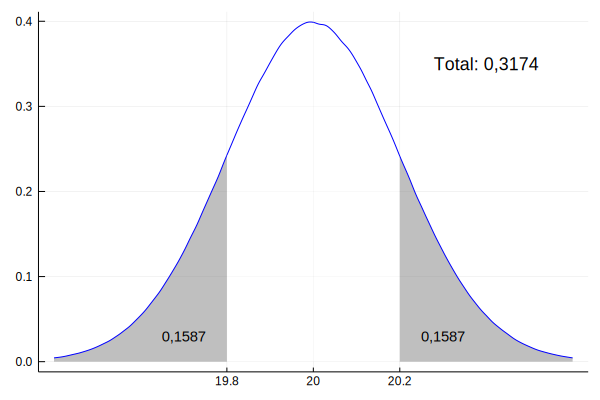

In [17]:
vetor = rand( Normal( 0 , 1 ),10000000)
npdensity(vetor)
xticks!(-1:1, ["19.8", "20", "20.2"])
annotate!([(-1.5, 0.03, text("0,1587", 10)), (1.5, 0.03, text("0,1587", 10)), (2, 0.35, text("Total: 0,3174", 12))])

#### Exemplo 2

Um fabricante de baterias alega que seu artigo de primeira categoria tem uma vida esperada (média) de 50 meses. Sabe-se que o desvio padrão correspondente é de 4 meses. Que percentagem de amostras de 36 observações acusará vida média no intervalo de 1 mês em torno de 50 meses, admitindo ser de 50 meses a verdadeira vida média das baterias? Qual será a resposta para uma amostra de 64 observações?

**Solução**: Sabemos que, como $n > 30$ a distribuição das médias amostrais será aproximadamente normal, com média igual à média populacional e desvio padrão igual ao desvio padrão populacional dividido pela raiz quadrada do tamanho da amostra. A solução envolve a determinação do número de desvios padrões que 49 e 51 meses distam da média: recorrendo a uma tabela de áreas sob a curva normal, obtemos as probabilidades procuradas.

Primeiro, vamos determinar o desvio padrão:

$$\sigma_{\bar{x}} = \frac{\sigma_x}{\sqrt{n}}$$

$$para \quad n = 36: \quad \sigma_{\bar{x}} = \frac{4}{\sqrt{36}} = \frac{4}{6} = 0,67$$

$$para \quad n = 64: \quad\sigma_{\bar{x}} = \frac{4}{\sqrt{64}} = \frac{4}{8} = 0,50$$

Em seguida determinemos a diferença em relação ao valor esperado:

$$z = \frac{estatistica - parametro}{\sigma_{\bar{x}}}$$

$$para \quad n = 36: \quad \frac{49 - 50}{0,67} = \frac{-1}{0,67} = -1.5 \sigma_{\bar{x}} \quad \quad \frac{51 - 50}{0,67} = \frac{1}{0,67} = +1.5 \sigma_{\bar{x}}$$

$$para \quad n = 64: \quad \frac{49 - 50}{0,50} = \frac{-1}{0,50} = -2 \sigma_{\bar{x}} \quad \quad \frac{51 - 50}{0,50} = \frac{1}{0,50} = +2 \sigma_{\bar{x}}$$

Finalmente, determinemos as áreas com auxílio da Tabela.

Para n = 36, z = 1,5. Área = 0,4332.

$$P(49 \leq \bar{x} \leq 51) = 0,4332 + 0,4332 = 0,8664$$

Para n = 64, z = 2. Área = 0,4773

$$P(49 \leq \bar{x} \leq 51) = 0,4773 + 0,4773 = 0,9546$$

#### Exemplo 3

Usando a informação contida no exemplo 2, qual seria probabilidade de obter uma média amostral inferior a 49,8 meses com uma amostra de 100 observações?

**Solução**:

$$\sigma_{\bar{x}} = \frac{\sigma_x}{\sqrt{n}} = \frac{4}{10} = 0,4$$

$$\frac{49,8 - 50}{0,4} = -0,5 \sigma_{\bar{x}}$$

A área abaixo de $-0,5 \sigma_{\bar{x}}$ é 0,3085

---

# Exercícios

Stevenson (1981, p. 185-6), TODOS.

---

# Distribuições de proporções amostrais

Uma distribuição de proporções amostrais indica quão provável é determinado conjunto de proporçõe amostrais, dados o tamanho da amostra e a proporção populacional. Quando o tamanho da amostra é 20 ou menos, as probabilidades dos diversos resultados possíveis podem ser lidos diretamente numa tabela de probabilidades binomiais simplesmente convertendo o número de sucessos em percentagens. Por exemplo, 3 ocorrências em 10 observações correspondem a 30%, 5 ocorrências em 20 correspondem a 25%. Para maiores amostras a aproximação normal da binomial dá resultados bastante satisfatórios.

A média (proporção ou percentagem média) da distribuição amostral é sempre igual à proporção populacional. Isto é

$$\bar{p} = p$$

onde $p$ é a proporção populacional e $\bar{p}$ é a média da distribuição amostral das porporções.

Quandoa a população é muito grande ou infinita, o desvio padrão da distribuição amostral se calcula pela fórmula 

$$\sigma_p = \sqrt{\frac{p(1-p)0,10{n}0,10$$
100## = \frac{0,3}{100} = 0,03## 

#### Exemplo

Um varejista compra copos diretamente da fábrica em grandes lotes. Os copos vêm embrulhados individualmente. Periodicamente o varejista inspeciona os lotes para determinar a proporção dos quebrados ou lascados. Se um grande lote contém 10% de quebrados ou lascados, qual a probabilidade de o varejista obter uma amostra de 100 copos com 17% ou mais defeituosos?

**Solução**: A distribuição amostral se centrará em 10% que é a percentagem populacional de defeituosos. O primeiro passo é calcular o desvio padrão da população:

$$\sigma_p = \sqrt{\frac{p(1-p)}{n}} = \sqrt{\frac{0,10(1-0,10)}{100}} = \frac{0,3}{100} = 0,03$$

Podemos usar esse resultado para determinar a variação relativa:

$$\frac{17\% - 10\%}{3\%} = \frac{7\%}{3\%} = 2,33 \sigma_p = z$$

A área além de $2,33 \sigma_p$ é 0,0099, conforme a tabela de referência.

# Distribuição amostral do número de ocorrências

A distribuição amostral do número de ocorrências segue o mesmo padrão que vimos até aqui. Com dados de contagens a média é dada por $np$ e o desvio padrão por

$$\sigma_{np} = \sqrt{np(1-np)}$$

#### Exemplo

Suponha que uma pesquisa recente tenha revelado que 60% de uma população de adultos do sexo masculino consista de não-fumantes. Tomada uma amostra de 600, calcule e interprete a média e o desvio padrão da distribuição amostral.

**Solução**: Temos n = 600, 0 = 0,60, de modo que $1-p = 0,40$.

$$M\acute{e}dia = np = 600(0,60) = 360$$

$$DesvioPadrao = \sqrt{np(1-np)} = \sqrt{600(0,60)(0,40)} = \sqrt{144} = 12$$

---

# Exercícios

Stevenson (1981, p. 188), todos. 

---

# Amostragem de uma população finita

A maior parte da amostragem se faz sem reposição. Enquanto o tamanho da amostra for pequeno em relação ao da populaçã, a amostragem sem reposição dará entre as amostras essencialmente a mesma variabilidade da amostragem com reposição. Entretanto, se o tamanho da amostra representa percentagem apreciável da população (digamos, mais do que 5%), já os resultados dos dois tipos de amostragem começam a diferir. Isso porque, na amostragem sem reposição, a probabilidade de extração de itens varia de uma para outra extração. Em tais condições, a distribuição adequada é a distribuição hipergeométrica. 

As fórmulas do desvio padrão das médias amostrais e do desvio padrão das proporções amostrais devem ser modificadas de modo a refletirem a probabilidade, se o tamanho da amostra é superior a 5% da população. Felizmente, a modificação hipergeométrica tem uma forma simples:

$$\sqrt{\frac{N - n}{N - 1}}$$

onde $N$ é o tamanho da população e $n$ é o tamanho da amostra.

Essa fórmula é designada como *fator de correção finita*, ou às vezes, *multiplicador de população finita*. Já que multiplica as expressões usuais do desvio padrão. 

O desvio padrão das médias amostrais se torna

$$\sigma_{\bar{x}} = \frac{\sigma_x}{\sqrt{n}} \sqrt{\frac{N - n}{N - 1}}$$

O desvio padrão das médias amostrais fica

$$\sigma_p = \sqrt{\frac{p(1-p)}{n}} \sqrt{\frac{N - n}{N - 1}}$$

e o desvio padrão do número de ocorrências se escreve

$$\sigma_{np} = \sqrt{np(1-np)} \sqrt{\frac{N - n}{N - 1}}$$

#### Exemplo

Uma máquina para recobrir cerejas com chocolate é regulada para produzir um revestimento de 3mm de espessura. O processo tem distribuição normal, com desvio padrão de 1 mm. Se o processo funciona conforme o esperado (isto é, a média de 3mm e o desvio padrão de 1mm), qual seria a probabilidade de extrair uma amostra de 25 de um lote de 169 cerejas e encontrar uma média amostral superior a 3,4 mm?

**Solução**: Como a população é finita, e a amostra é maior do que 5%, cabe aplicar o fator de correção finita. A solução exige a determinação de quão afastado da média está o valor 3,4 mm (em termos de desvios padrões), usando-se o valor para obter a possiblidade na tabela da curva normal. 

\begin{align}
\sigma_{\bar{x}} & = \frac{\sigma_x}{\sqrt{n}} \sqrt{\frac{N - n}{N - 1}} \\
 & = \frac{1}{\sqrt{25}} \sqrt{\frac{169-25}{168}} \\
 & = \frac{1}{5} (0,92) \\
 & = 0,185
\end{align}

Então...

\begin{align}
\frac{\bar{x} - \mu}{\sigma_{\bar{x}}} & = \frac{3,4 - 3,0}{0,185} \\
 & = \frac{0,4}{0,185} \\
 & \approx 2,2 \sigma_{\bar{x}}
\end{align}

A área sob a curva normal além de $\mu + ,2 \sigma_{\bar{x}}$ é $0,0139$. Assim $P(x > 3,4) = 1,39\%$.